# Placement_Data

### DATASET INFORMATION: 

This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

* sl_no	  == Serial Number
* gender	  == Gender- Male='M',Female='F'
* ssc_p	  == Secondary Education percentage- 10th Grade
* ssc_b	  == Board of Education- Central/ Others
* hsc_p	  == Higher Secondary Education percentage- 12th Grade
* hsc_b	  == Board of Education- Central/ Others
* hsc_s	  == Specialization in Higher Secondary Education
* degree_p	  == Degree Percentage
* degree_t	  == Under Graduation(Degree type)- Field of degree education
* workex	  == Work Experience
* etest_p	  == Employability test percentage ( conducted by college)
* specialisation	  == Post Graduation(MBA)- Specialization
* mba_p	  == MBA percentage
* status	  == Status of placement- Placed/Not placed (dependent variable)
* salary  == Salary offered by corporate to candidates

In [6]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.2/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.4/99.8 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.8/99.8 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 0.9/99.8 MB 2.8 MB/s eta 0:00:36
    --------------------------------------- 1.4/99.8 MB 4.3 MB/s eta 0:00:23
    ------------------------------

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#SK-Learn        
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import time
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding (10 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)

d.	Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. ( 7 marks)


### a. Read the dataset and identify the number of rows, columns, and types of variables.

In [3]:
import pandas as pd

df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Number of rows and columns
rows, cols = df.shape

# Data types
data_types = df.dtypes

print("Number of rows:", rows)
print("Number of columns:",cols)
print("Data Types:\n", data_types)


Number of rows: 215
Number of columns: 15
Data Types:
 sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### b. Calculate five-point summary for numerical variables.

In [20]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### c. Summary of Categorical Variables

In [21]:
# Assuming 'categorical_columns' contains the names of categorical columns
categorical_columns = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation',]

for col in categorical_columns:
    unique_categories = df[col].nunique()
    category_counts = df[col].value_counts(normalize=True) * 100
    print(f"\nColumn: {col}")
    print(f"Number of unique categories: {unique_categories}")
    print("Percentage of observations in each category:")
    print(category_counts)


Column: gender
Number of unique categories: 2
Percentage of observations in each category:
M    64.651163
F    35.348837
Name: gender, dtype: float64

Column: ssc_b
Number of unique categories: 2
Percentage of observations in each category:
Central    53.953488
Others     46.046512
Name: ssc_b, dtype: float64

Column: hsc_b
Number of unique categories: 2
Percentage of observations in each category:
Others     60.930233
Central    39.069767
Name: hsc_b, dtype: float64

Column: hsc_s
Number of unique categories: 3
Percentage of observations in each category:
Commerce    52.558140
Science     42.325581
Arts         5.116279
Name: hsc_s, dtype: float64

Column: degree_t
Number of unique categories: 3
Percentage of observations in each category:
Comm&Mgmt    67.441860
Sci&Tech     27.441860
Others        5.116279
Name: degree_t, dtype: float64

Column: workex
Number of unique categories: 2
Percentage of observations in each category:
No     65.581395
Yes    34.418605
Name: workex, dtype: f

### d. Checking for Defects in the Data

Missing Values:
 sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


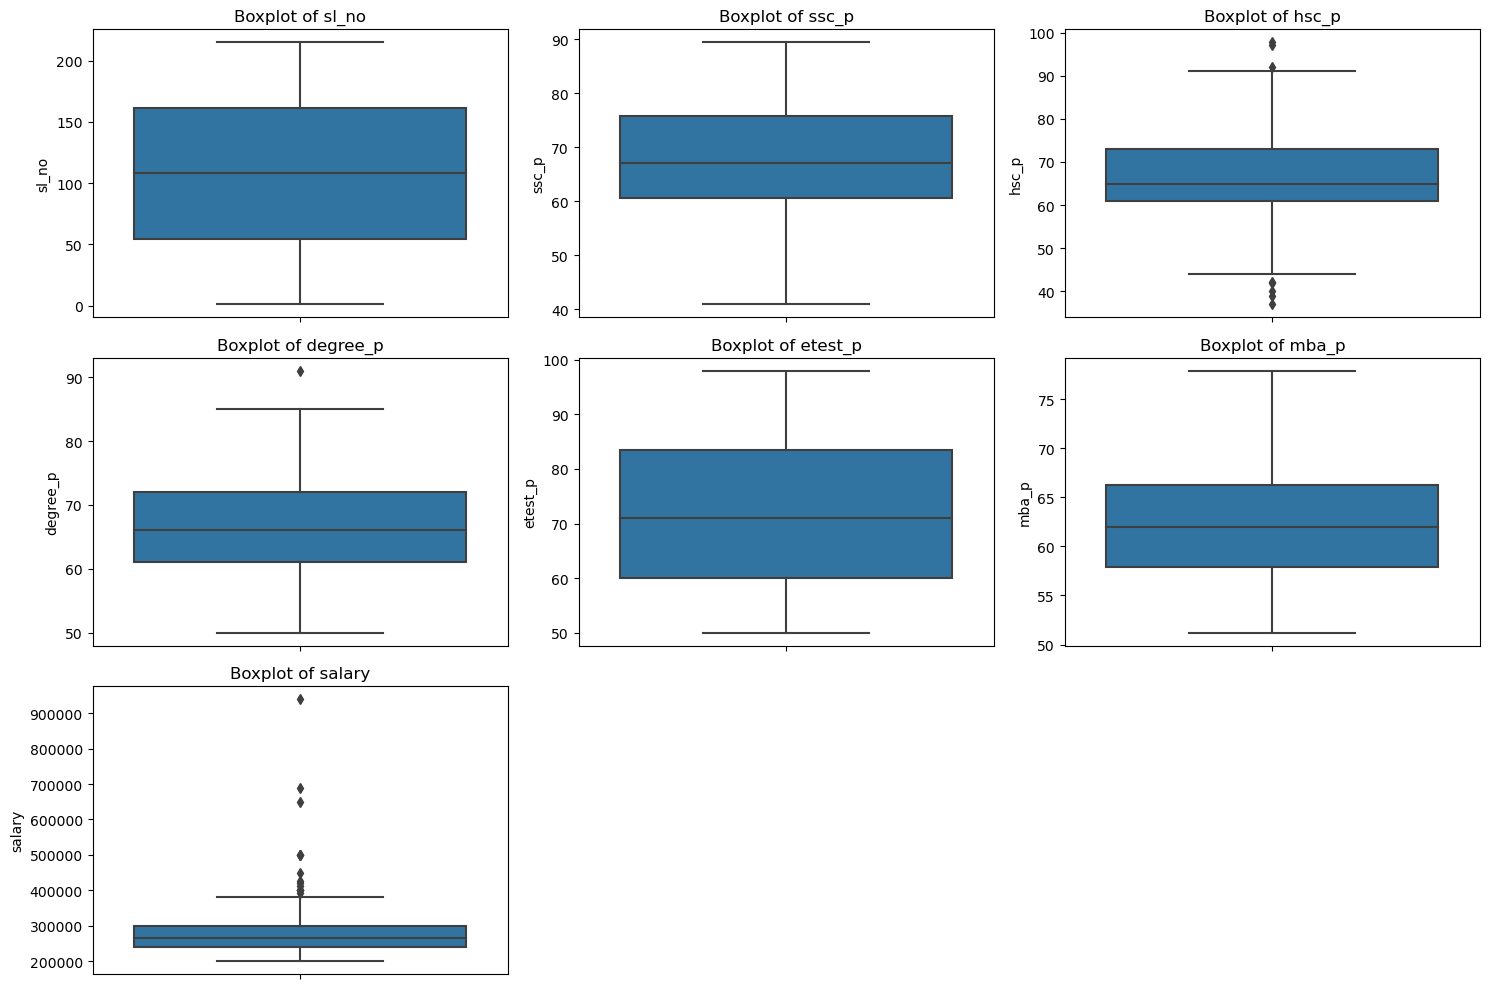

Class Imbalance:
 Placed        68.837209
Not Placed    31.162791
Name: status, dtype: float64


In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers in numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Check for class imbalance in the target variable
class_imbalance = df['status'].value_counts(normalize=True) * 100
print("Class Imbalance:\n", class_imbalance)


### 2.	Data Preparation (15 marks)

a.	Fix the defects found above and do appropriate treatment if any. (6 marks)

b.	Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (6 marks)

c.	Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? (2 marks)

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (1 mark)


### a. Fix defects and appropriate treatment.
    Missing values: We will handle the missing values in the salary column.
    Outliers: We will consider handling outliers if they affect our model's performance.
    Class imbalance: We will address class imbalance if it exists.

In [24]:
# Fixing missing values
df['salary'].fillna(df['salary'].median(), inplace=True)

# Optionally, you can handle outliers using techniques such as capping, transformation, or removing outliers.
# For demonstration, let's cap the outliers in the salary column.
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['salary'] = df['salary'].clip(lower=lower_bound, upper=upper_bound)


### b. Visualize the data using relevant plots.

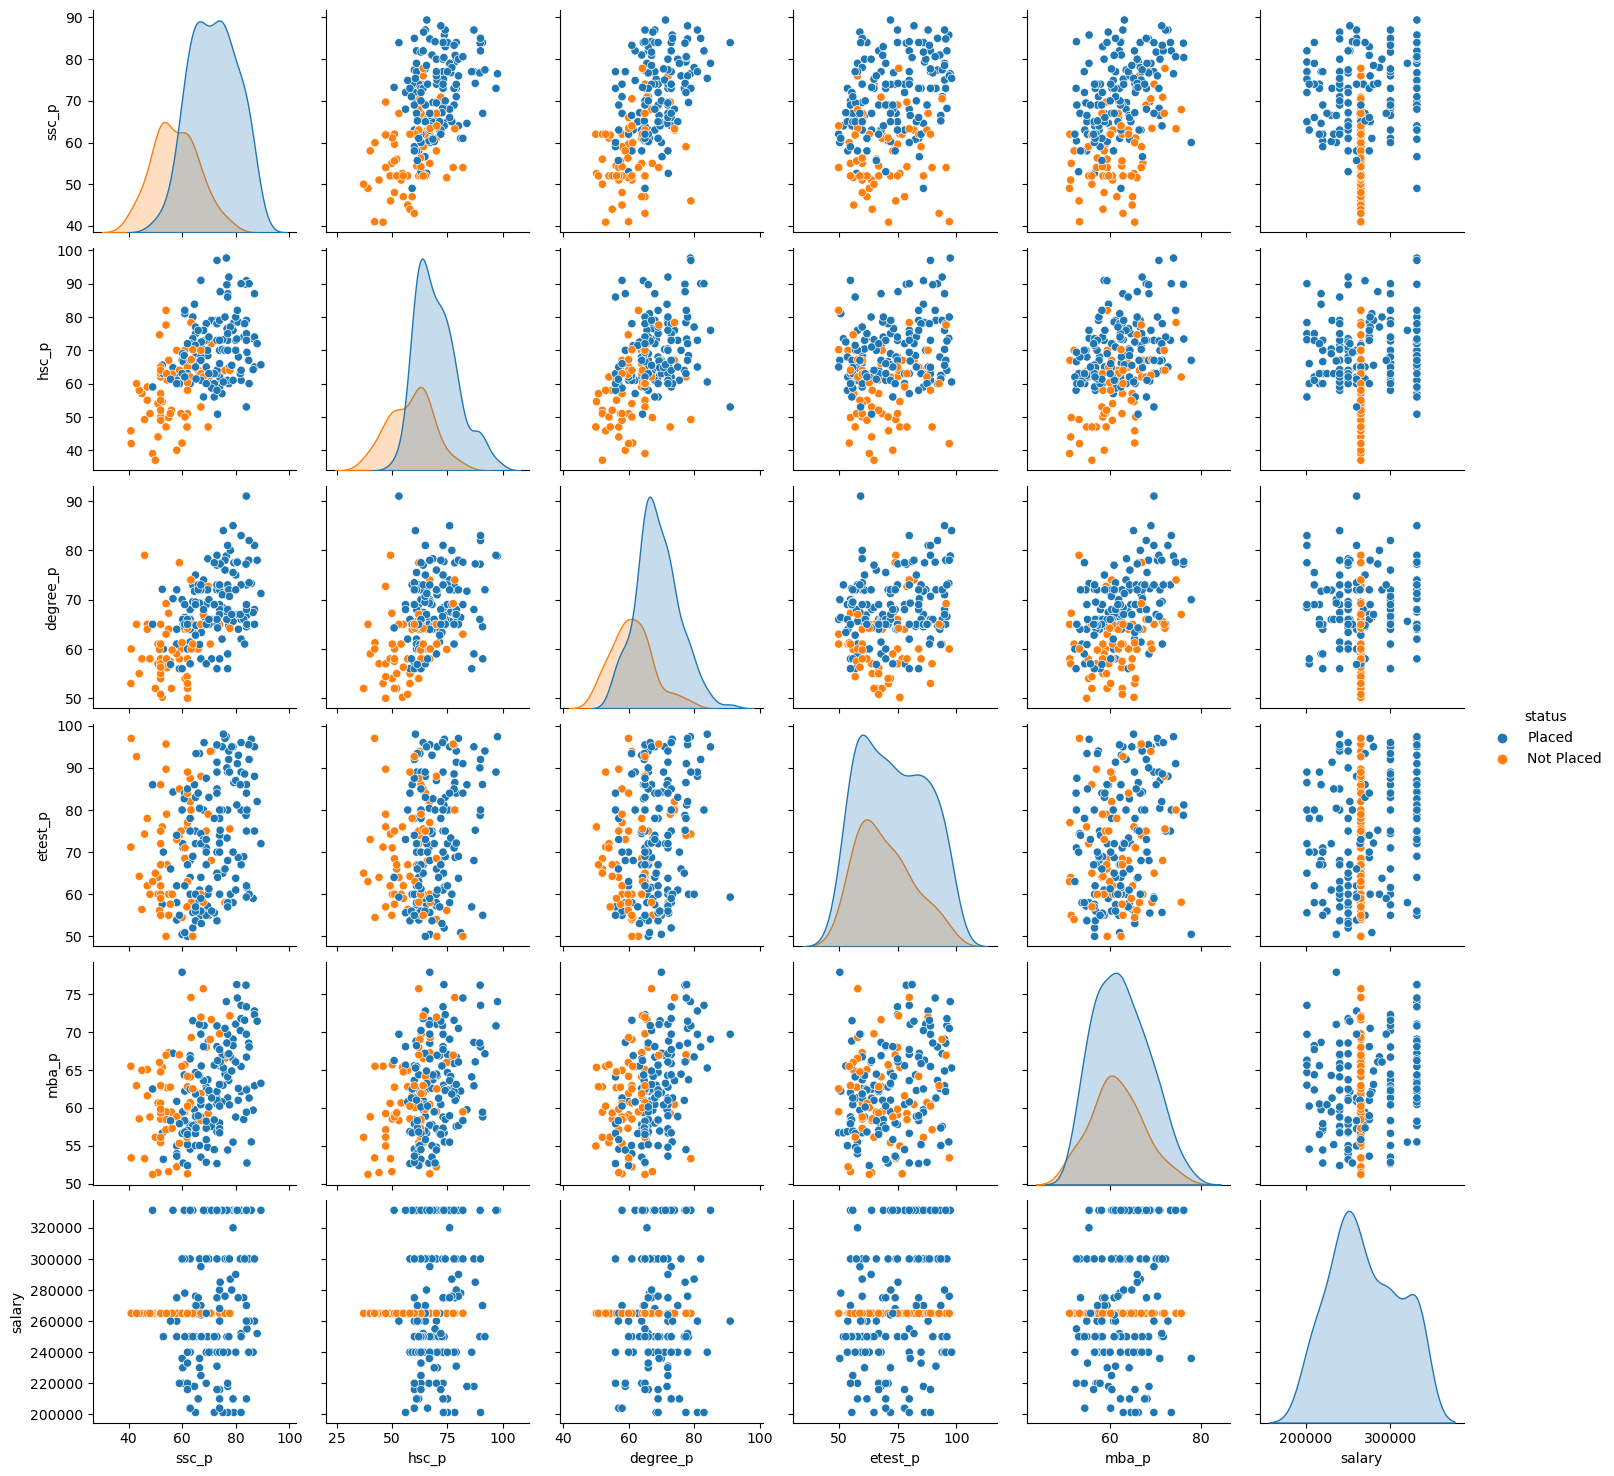

In [25]:
# Pairplot to visualize the relationships
sns.pairplot(df, hue='status', vars=['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'])
plt.show()

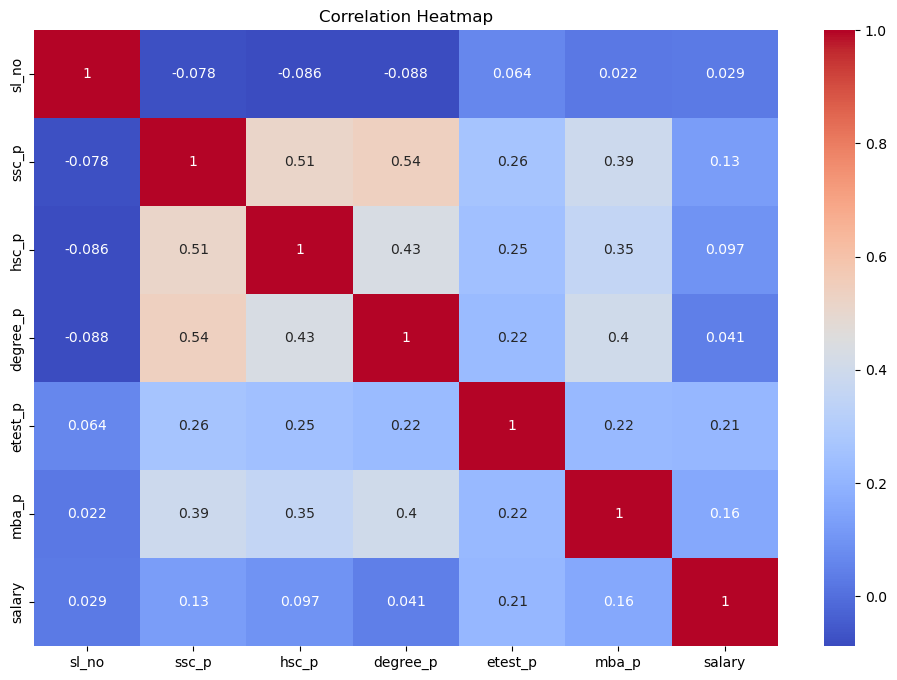

In [26]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### c. Exclude variables and other actions before model creation.

In [27]:
# Create dummy variables for categorical features
df = pd.get_dummies(df, drop_first=True)

# Drop the sl_no column as it is not relevant for prediction
df.drop(columns=['sl_no'], inplace=True)


### d. Split dataset into train and test (70:30).

In [28]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['status_Placed'])
y = df['status_Placed']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check if the split is representative of the overall data
train_class_balance = y_train.value_counts(normalize=True)
test_class_balance = y_test.value_counts(normalize=True)
print("Train Class Balance:\n", train_class_balance)
print("Test Class Balance:\n", test_class_balance)


Train Class Balance:
 1    0.686667
0    0.313333
Name: status_Placed, dtype: float64
Test Class Balance:
 1    0.692308
0    0.307692
Name: status_Placed, dtype: float64


### 3.	Model Building (15 marks)

a.	Fit a base model and explain the reason of selecting that model. Please write your key observations. (3 marks)

b.	What is the overall Accuracy? Please comment on whether it is good or not.  (2 mark)

c.	Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (3 marks) 

d.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.  (5 marks)

e.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (2 marks)

### a. Fit a base model and explain the reason for selecting it.

Let's start with a Logistic Regression model, which is suitable for binary classification problems.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Fit a base Logistic Regression model
base_model = LogisticRegression(max_iter=1000, random_state=42)
base_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [30]:
# Predictions
y_pred_train = base_model.predict(X_train)
y_pred_test = base_model.predict(X_test)

In [31]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.7533333333333333
Test Accuracy: 0.7538461538461538


### b. Overall accuracy and whether it is good or not.

In [32]:
print("Train Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.43      0.52        47
           1       0.78      0.90      0.83       103

    accuracy                           0.75       150
   macro avg       0.72      0.66      0.68       150
weighted avg       0.74      0.75      0.74       150

Test Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50        20
           1       0.77      0.91      0.84        45

    accuracy                           0.75        65
   macro avg       0.72      0.66      0.67        65
weighted avg       0.74      0.75      0.73        65



The model shows an overall accuracy of 75% on both the training and test sets, indicating consistency between the train and test performance. However, accuracy alone isn't sufficient to determine if the model is good, especially with imbalanced classes. 

Precision:
For Class 0 (Not Placed), the precision is 0.67 (Train) and 0.67 (Test).
For Class 1 (Placed), the precision is 0.78 (Train) and 0.77 (Test).
The model is relatively good at predicting placements correctly, but less so for non-placements.

Recall:
For Class 0, the recall is 0.43 (Train) and 0.40 (Test).
For Class 1, the recall is 0.90 (Train) and 0.91 (Test).
The model is very good at identifying placed students but struggles with correctly identifying not placed students.

F1-score:
For Class 0, the F1-score is 0.52 (Train) and 0.50 (Test).
For Class 1, the F1-score is 0.83 (Train) and 0.84 (Test).
The harmonic mean of precision and recall shows that the model performs well for placed students but less so for non-placed students.

### c. Evaluate the model using Precision, Recall, and F1 Score.

In [33]:
# Classification report already gives Precision, Recall, and F1 Score
# We can also calculate these metrics individually if needed
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.7735849056603774
Recall: 0.9111111111111111
F1 Score: 0.8367346938775511


### d. Improve the model accuracy.

To improve model accuracy, we can consider techniques such as feature engineering, tuning hyperparameters, using more complex models, or handling class imbalance through techniques like SMOTE.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Using RandomForest with GridSearch for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predictions
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Accuracy
train_accuracy_best = accuracy_score(y_train, y_pred_train_best)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)
print(f"Improved Train Accuracy: {train_accuracy_best}")
print(f"Improved Test Accuracy: {test_accuracy_best}")

print("Improved Train Classification Report:\n", classification_report(y_train, y_pred_train_best))
print("Improved Test Classification Report:\n", classification_report(y_test, y_pred_test_best))


Improved Train Accuracy: 1.0
Improved Test Accuracy: 0.9230769230769231
Improved Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00       103

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Improved Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.92      0.98      0.95        45

    accuracy                           0.92        65
   macro avg       0.93      0.89      0.91        65
weighted avg       0.92      0.92      0.92        65



### e. Business interpretation/explanation of the model.

We can analyze feature importances from the RandomForest model to understand which variables affect the target the most.

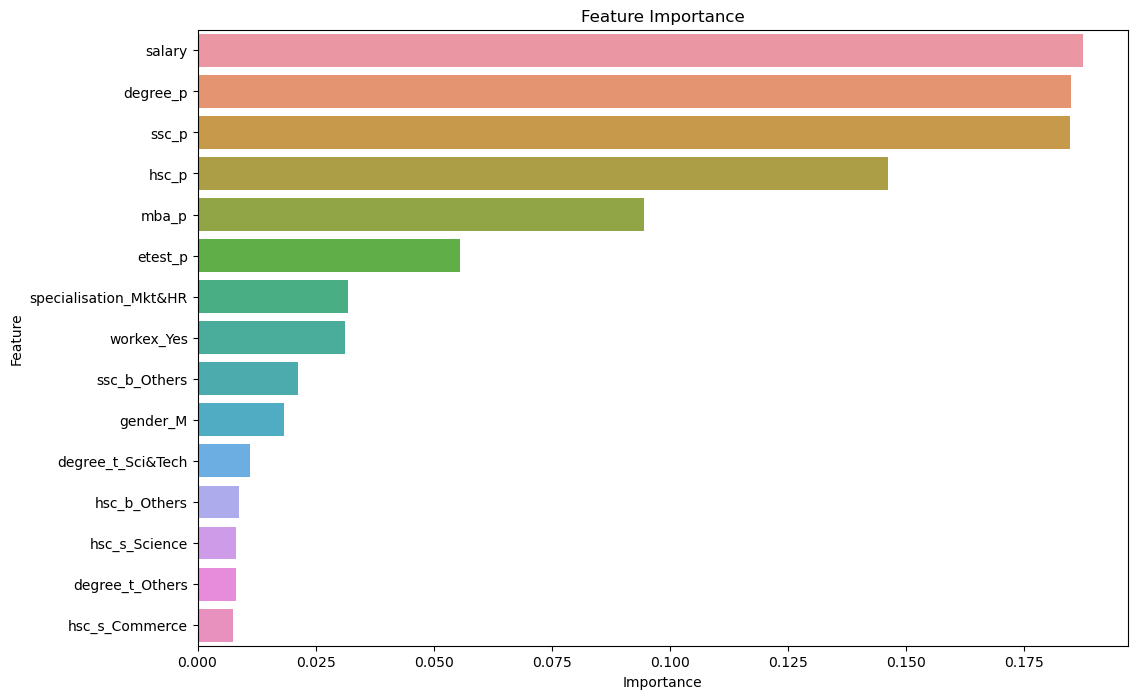

Feature Importance:
                   Feature  Importance
5                  salary    0.187566
2                degree_p    0.185014
0                   ssc_p    0.184864
1                   hsc_p    0.146150
4                   mba_p    0.094560
3                 etest_p    0.055609
14  specialisation_Mkt&HR    0.031965
13             workex_Yes    0.031199
7            ssc_b_Others    0.021192
6                gender_M    0.018371
12      degree_t_Sci&Tech    0.011092
8            hsc_b_Others    0.008750
10          hsc_s_Science    0.008184
11        degree_t_Others    0.008061
9          hsc_s_Commerce    0.007422


In [14]:
# Feature importances
importances = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

print("Feature Importance:\n", feature_importance_df)
